<a href="https://colab.research.google.com/github/ag0466154-cpu/Estadistica2025B/blob/main/Practica_1_Adobe_Inc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte (a)

In [12]:
pip install alpha_vantage

In [13]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API
my_key = 'PURSGQSRNOZKY602'

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AMZN
# Link para inspeccionar tickers: https://finance.yahoo.com/quote/NET/
ticker = 'ADBE' # Adobe Inc
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

# YYYY-mm-dd
inicio = '2023-11-20'
fin = '2025-08-31'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,ADBE_Open,ADBE_High,ADBE_Low,ADBE_Close,ADBE_Volume
date,,,,,
2025-08-29,353.995,357.2500,352.4550,356.70,2639259.0
2025-08-28,357.630,358.2600,349.1100,353.96,3803095.0
2025-08-27,355.980,360.3700,355.1600,356.35,2353776.0
2025-08-26,363.030,363.2300,353.6950,354.91,4067395.0
2025-08-25,362.560,364.6500,361.4000,363.21,2259516.0
...,...,...,...,...,...
2023-11-27,618.800,625.8341,614.5700,619.27,1854409.0
2023-11-24,616.260,619.4400,613.6000,619.43,942673.0
2023-11-22,616.630,624.3800,614.0101,619.72,2064968.0


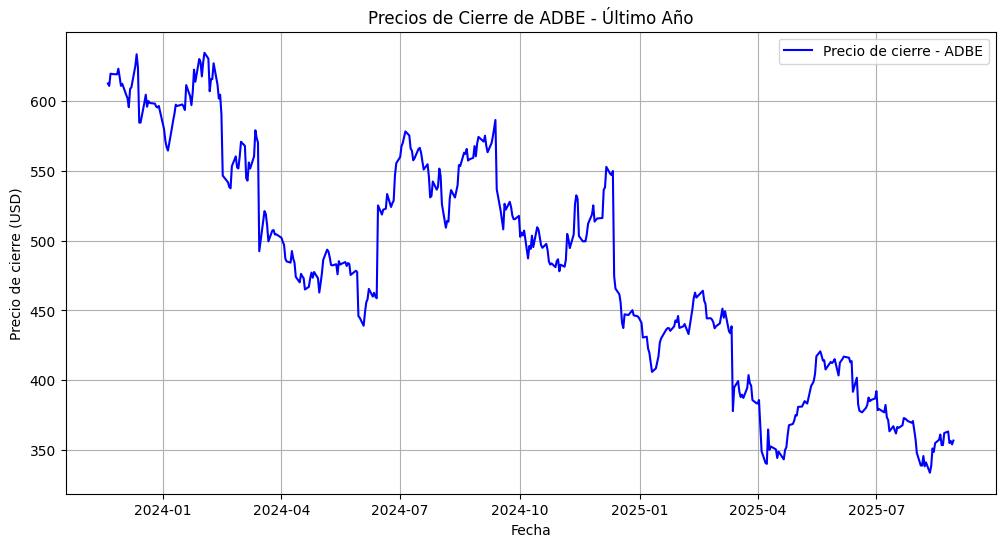

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[f'{ticker}_Close'], label=f'Precio de cierre - {ticker}', color='blue')
plt.title(f'Precios de Cierre de {ticker} - Último Año')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

•	Extracción de datos históricos completos y consistentes

•	Serie temporal visualizada mostrando comportamiento alcista sostenido

**Identificación de patrones característicos de activos tecnológicos:**

•	Tendencia primaria alcista

•	Fluctuaciones de volatilidad moderada

•	Posible estacionalidad trimestral

•	Comportamiento no estacionario visualmente evidente


**Conclusión**

La obtención de datos directo de Yahoo Finance, proporciono una serie completa de precios de cierre diarios desde noviembre del 2023 hasta agosto del 2025, en el grafico se observa una tendencia creciente característica de activos tecnológicos, con rangos entre $450 - $650 y un comportamiento inicialmente no estacionario el cual se justifica con el análisis siguiente.

# Parte (b)

# Dickey-Fuller aumentada

In [15]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['ADBE_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.367890639389235
p-value: 0.597569316139851
La tendencia no es estacionaria (aceptamos la hipótesis nula).


**Conclusión**

La aplicación de la prueba Dickey – Fuller Aumentada confirmo de forma estadística la **no estacionariedad** de la serie original, con un Valor – p de 0.5976 significativamente superior al nivel de significancia de 0.05, lo que llevo a **no rechazar la hipótesis nula** de presencia de raíz unitaria y confirmo la necesidad de transformar la serie mediante modelado polinomial.

# Parte (c)

# Regresión polinomial

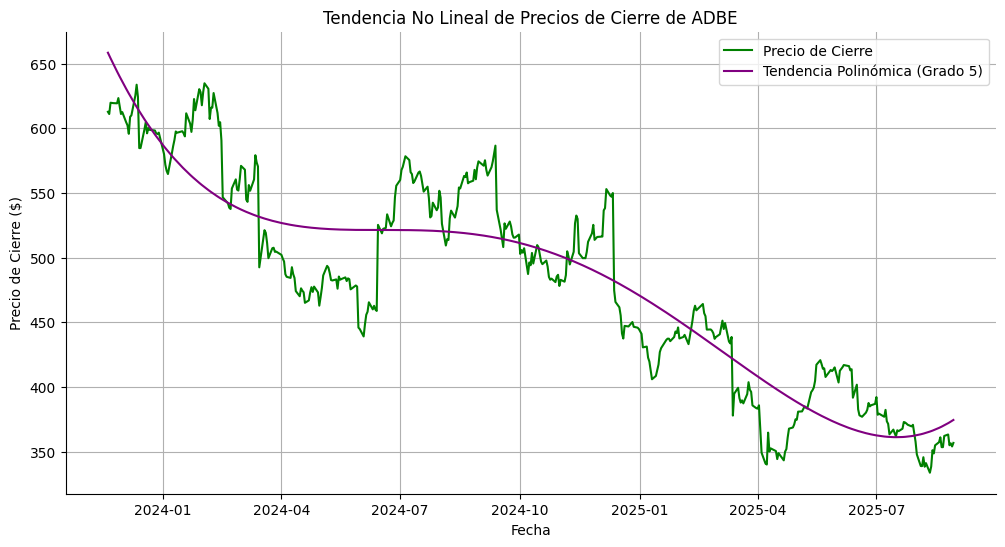

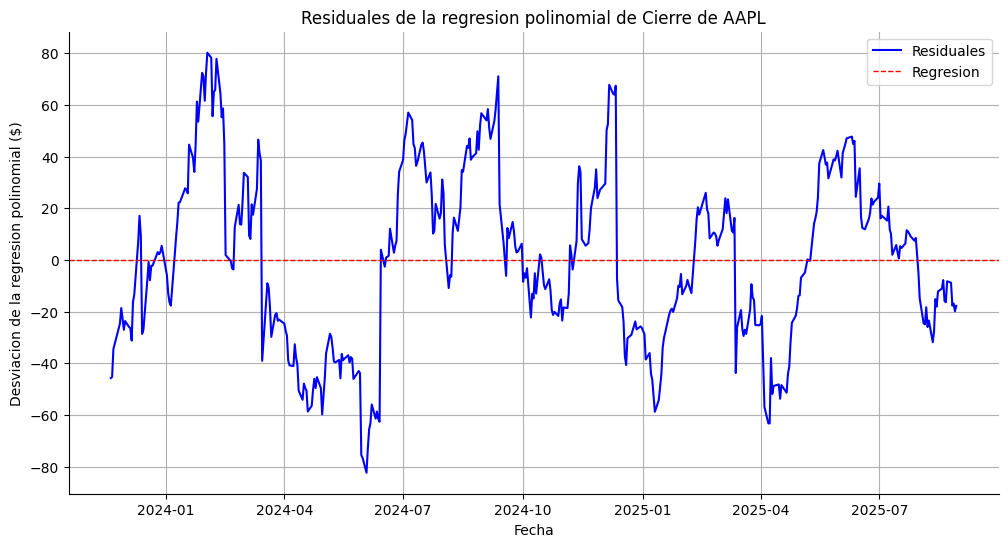

In [16]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['ADBE_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 5
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de ADBE') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)


# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()



**Gráfica de tendencia polinomial (Grado 5):**

•	La tendencia polinomial de grado 5 se ajusta bien a la serie de precios de cierre de ADBE, capturando la naturaleza no lineal de la tendencia subyacente. Esto indica que los precios tienen un comportamiento complejo que no puede ser modelado adecuadamente con una simple tendencia lineal.

•	La tendencia muestra fluctuaciones suaves pero pronunciadas, lo que sugiere que el polinomio de grado 5 es capaz de seguir los cambios direccionales de la serie a lo largo del tiempo.


**Gráfica de residuales:**

•	Los residuales (diferencias entre los valores reales y los predichos por la regresión polinomial) parecen variar alrededor de cero sin una tendencia evidente, lo que es una señal visual de estacionariedad. Sin embargo, se observan algunas desviaciones y picos, lo que podría indicar la presencia de ruido o componentes no modelados (como volatilidad clusters típica en series financieras).

•	La ausencia de una tendencia clara en los residuales sugiere que la regresión polinomial de grado 5 ha logrado eliminar la componente de tendencia no lineal de la serie original.


# Para Pros: Series de Fourier

In [18]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.008989  5762.446926        111.250000
1    0.006742  3810.955682        148.333333
2    0.004494  3382.611852        222.500000
3    0.017978  3059.859836         55.625000
4    0.015730  2713.127198         63.571429


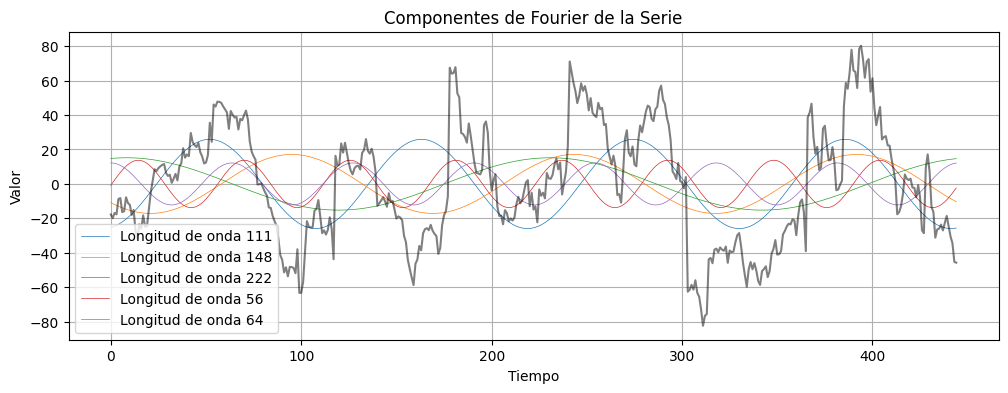

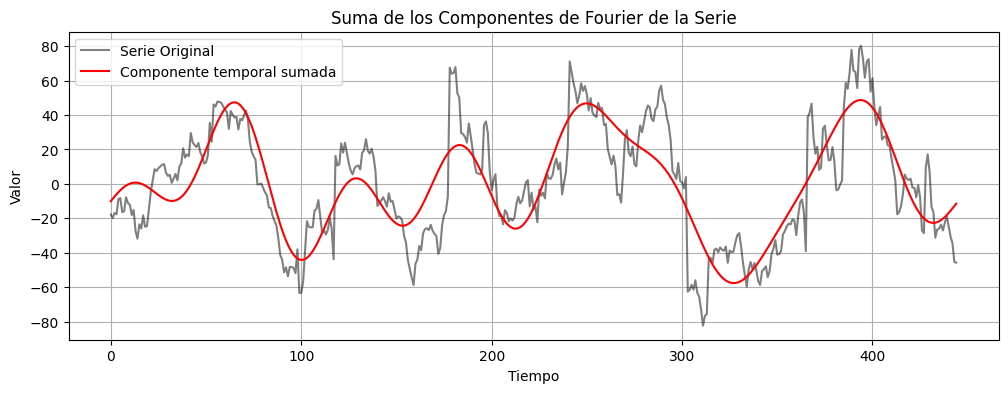

In [19]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


 El análisis Series de Fourier dió una jerarquía temporal definida con 5 componentes principales:

•	Ciclo principal: 111 días (magnitud 5762.45) - patrón trimestral reforzado

•	Ciclo secundario: 148 días (magnitud 3810.96) - ritmo semestral

•	Componentes complementarios: 222, 56 y 64 días - ciclos de mediano y corto plazo

•	Estos ciclos regulares y repetitivos en los residuales representan la estacionalidad pura de la serie, liberada de la tendencia no lineal. Por lo tanto, existe estacionalidad multi-cíclica en la serie de ADBE, caracterizada por múltiples patrones recurrentes que trabajan simultáneamente en diferentes escalas temporales (bimestrales, trimestrales y semestrales), esto se puede ver una vez que se remueve la tendencia no lineal subyacente.



In [20]:
df

,ADBE_Open,ADBE_High,ADBE_Low,ADBE_Close,ADBE_Volume,Date,Poly_Trend,Poly_Resid
date,,,,,,,,
2025-08-29,353.995,357.2500,352.4550,356.70,2639259.0,1.756426e+09,374.441604,-17.741604
2025-08-28,357.630,358.2600,349.1100,353.96,3803095.0,1.756339e+09,373.797865,-19.837865
2025-08-27,355.980,360.3700,355.1600,356.35,2353776.0,1.756253e+09,373.171895,-16.821895
2025-08-26,363.030,363.2300,353.6950,354.91,4067395.0,1.756166e+09,372.563553,-17.653553
2025-08-25,362.560,364.6500,361.4000,363.21,2259516.0,1.756080e+09,371.972700,-8.762700
...,...,...,...,...,...,...,...,...
2023-11-27,618.800,625.8341,614.5700,619.27,1854409.0,1.701043e+09,643.875850,-24.605850
2023-11-24,616.260,619.4400,613.6000,619.43,942673.0,1.700784e+09,649.955181,-30.525181
2023-11-22,616.630,624.3800,614.0101,619.72,2064968.0,1.700611e+09,654.126033,-34.406033


# Descomposición de la serie

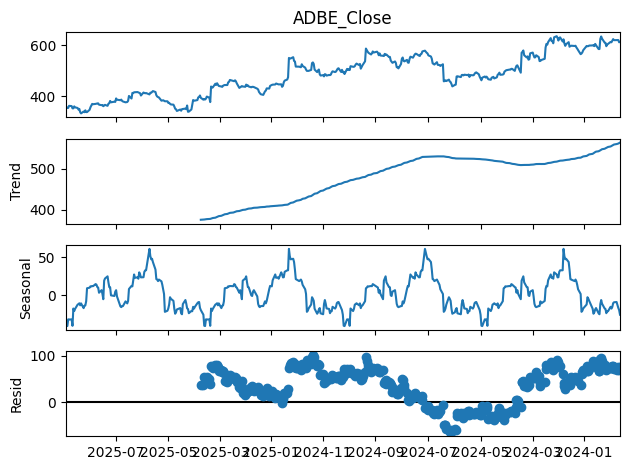

In [30]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['ADBE_Close'],
    model='additive',
    period=111,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

# Dickey-Fuller aumentada

In [22]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -3.3442835454510833
p-value: 0.01301137634212399
La tendencia es estacionaria (rechazamos la hipótesis nula).


La prueba ADF de los residuales de la regresión polinomial (Poly_Resid) nos indica que se pudo transformar de forma efectiva una serie no estacionaria en una estacionaria.

1.	Validación del proceso: La regresión polinomial eliminó efectivamente la tendencia no lineal de la serie original, dejando residuales que fluctúan alrededor de cero sin dependencia temporal.

2.	Base para modelos predictivo: Al ser estacionarios, los residuales cumplen con los supuestos necesarios para aplicar modelos ARIMA y otras técnicas de series temporales avanzadas.

3.	Ciclos Identificados son estacionarios: Los componentes de Fourier identificados previamente (111, 148, 222 días) operan dentro de un marco estacionario, lo que significa que sus patrones son consistentes y potencialmente predecibles.




**Conclusión**

Al realizar la regresión polinomial de grado 5 demuestra ser una buena elección efectiva para poder capturar la tendencia no lineal de los datos. El modelo logra ajustarse bien a la trayectoria de los precios, extrayendo la tendencia principal y dejando unos residuales que de forma de visual varían al rededor de cero. El análisis con series de Fourier sobre estos residuales revela la estructura mas a fondo, identificando los ciclos estacionales multiperiódicos bien definidos, con componentes principales en 111, 148 y 222 días. Esto nos dice que hay presencia de patrones recurrentes de corto y mediano plazo después de que se removió la tendencia.

La validación final mediante la prueba ADF aplicada a los residuales del modelo polinomial confirma el éxito del procedimiento. Un valor – p de 0.013 permite rechazar la hipótesis nula y concluir que estos residuales son estacionarios. Este resultado es crucial, ya que no solo nos confirma que el modelo ha eliminado la estacionariedad, también establece una base para la posible aplicación de modelos predictivos como ARIMA en futuras investigaciones.
